In [1]:
using Revise
using GenSlam
import Random
import Gen
import PoseComposition: IDENTITY_ORN
Random.seed!(0);

┌ Info: Precompiling GenSlam [921d89da-470c-4139-990e-345fceaa5d1a]
└ @ Base loading.jl:1342


In [2]:
# create scene
num_objects = 3
gt_poses = sample_static_scene(num_objects);

In [3]:
# generate initial state
obs_poses = gt_poses_to_obs_poses(gt_poses)
observations = Gen.choicemap()
for (i, pose) in enumerate(obs_poses)
    name = (:obj, i)
    observations[:obs => name] = pose
    observations[:agent => :rot] = IDENTITY_ORN
end

hypers = Hypers(
    num_objects = 3,
    scene_pose_bounds = (xmin=-1,xmax=1,ymin=-1,ymax=1,zmin=-1,zmax=1),
    obs_pos_stdev = 0.01,
    obs_rot_conc = 500.
)
trace, weight = Gen.generate(static_model, (hypers,), observations);

In [4]:
# perform inference
num_iters = 4000
for iter in 1:num_iters
    global trace
    for i in 1:hypers.num_objects
        trace = pose_kernel(trace, x -> (:obj, i) => x; scale=num_iters/(10*iter))
    end
    trace = pos_kernel(trace, x -> :agent => x)
    println("Iter $iter, Score = $(Gen.get_score(trace))")
end

Iter 1, Score = -60580.734780256265
Iter 2, Score = -59051.42423443945
Iter 3, Score = -52593.14980448069
Iter 4, Score = -50185.17261244537
Iter 5, Score = -43825.96237365465
Iter 6, Score = -37594.33383878839
Iter 7, Score = -36794.011705792625
Iter 8, Score = -24560.370427806913
Iter 9, Score = -23601.055640149407
Iter 10, Score = -23065.152962225977
Iter 11, Score = -22787.222756525258
Iter 12, Score = -22787.222756525258
Iter 13, Score = -15795.479839892838
Iter 14, Score = -15356.953803078497
Iter 15, Score = -13340.403873103598
Iter 16, Score = -5060.801868673735
Iter 17, Score = -4769.560927855985
Iter 18, Score = -4769.560927855985
Iter 19, Score = -3870.972122199511
Iter 20, Score = -2819.708850051456
Iter 21, Score = -2821.080782111378
Iter 22, Score = -1561.5069169805738
Iter 23, Score = -1361.4638509913273
Iter 24, Score = -1225.2097980888561
Iter 25, Score = -1207.5126268672818
Iter 26, Score = -1149.843352173572
Iter 27, Score = -1149.843352173572
Iter 28, Score = -1149.

Iter 252, Score = -229.53234359142166
Iter 253, Score = -230.1997762009348
Iter 254, Score = -232.63517778026485
Iter 255, Score = -233.8611044672248
Iter 256, Score = -233.8611044672248
Iter 257, Score = -233.6191420083533
Iter 258, Score = -229.5942336394277
Iter 259, Score = -229.37417749083247
Iter 260, Score = -226.14333167518063
Iter 261, Score = -226.14333167518063
Iter 262, Score = -226.14333167518063
Iter 263, Score = -221.27369053114566
Iter 264, Score = -223.11995113945952
Iter 265, Score = -223.11995113945952
Iter 266, Score = -222.3746147868389
Iter 267, Score = -217.02920545231146
Iter 268, Score = -217.51563968195276
Iter 269, Score = -219.57910012356282
Iter 270, Score = -217.3663985903683
Iter 271, Score = -214.73748395706323
Iter 272, Score = -210.16246286444914
Iter 273, Score = -210.16246286444914
Iter 274, Score = -211.28841664112937
Iter 275, Score = -210.20716313648265
Iter 276, Score = -209.4167799274535
Iter 277, Score = -209.81096818323405
Iter 278, Score = -2

Iter 525, Score = -126.73361033523919
Iter 526, Score = -125.84915681839217
Iter 527, Score = -125.42139633241189
Iter 528, Score = -124.62559021834923
Iter 529, Score = -126.04045904091782
Iter 530, Score = -128.09257900362243
Iter 531, Score = -131.9050720468449
Iter 532, Score = -129.50825711976512
Iter 533, Score = -137.1543830836898
Iter 534, Score = -137.1543830836898
Iter 535, Score = -138.56148342256438
Iter 536, Score = -135.98008896175529
Iter 537, Score = -137.31742411744466
Iter 538, Score = -134.83332368677844
Iter 539, Score = -135.03282012931084
Iter 540, Score = -133.0388456157359
Iter 541, Score = -135.25851872773075
Iter 542, Score = -134.30086394870673
Iter 543, Score = -132.67808075219395
Iter 544, Score = -127.71002798098488
Iter 545, Score = -127.53853948051399
Iter 546, Score = -127.85773951043814
Iter 547, Score = -127.78956451778204
Iter 548, Score = -128.01847118561625
Iter 549, Score = -127.64895058122508
Iter 550, Score = -127.64895058122508
Iter 551, Score 

Iter 806, Score = -51.90088299941773
Iter 807, Score = -54.40502170177635
Iter 808, Score = -56.52446583455748
Iter 809, Score = -56.24036835236966
Iter 810, Score = -52.171038231332155
Iter 811, Score = -51.994632930901304
Iter 812, Score = -48.33228712350512
Iter 813, Score = -51.48198144891499
Iter 814, Score = -48.89674780647062
Iter 815, Score = -47.460000889154934
Iter 816, Score = -46.450298829958726
Iter 817, Score = -45.36181103881582
Iter 818, Score = -45.32476515700522
Iter 819, Score = -47.434556893362405
Iter 820, Score = -46.25947853547437
Iter 821, Score = -45.01084487085122
Iter 822, Score = -45.97663245837647
Iter 823, Score = -48.25085494649831
Iter 824, Score = -46.633941949092474
Iter 825, Score = -42.329015122281156
Iter 826, Score = -41.40800891104186
Iter 827, Score = -40.671191956806176
Iter 828, Score = -40.69293249238244
Iter 829, Score = -40.4135547252122
Iter 830, Score = -39.784368899423356
Iter 831, Score = -39.784368899423356
Iter 832, Score = -42.5189187

Iter 1087, Score = 1.8015340000806077
Iter 1088, Score = 1.9912886018576117
Iter 1089, Score = 4.822754691212239
Iter 1090, Score = 2.9434905817918846
Iter 1091, Score = 4.829440571119932
Iter 1092, Score = 2.41003060314155
Iter 1093, Score = 3.1707601542230073
Iter 1094, Score = 3.3328153667522216
Iter 1095, Score = 3.2661151038133553
Iter 1096, Score = 3.240289885357864
Iter 1097, Score = 5.790754017670533
Iter 1098, Score = -0.9276524420284318
Iter 1099, Score = -0.8846737962476077
Iter 1100, Score = 2.7382280507043966
Iter 1101, Score = 1.1806368242845586
Iter 1102, Score = -0.9458471049140265
Iter 1103, Score = -0.3759866263040017
Iter 1104, Score = 5.8801689412469855
Iter 1105, Score = 5.131350510948042
Iter 1106, Score = 4.769139714174248
Iter 1107, Score = 7.889914886586361
Iter 1108, Score = 7.039702358764906
Iter 1109, Score = 10.092566382248481
Iter 1110, Score = 10.118405614717727
Iter 1111, Score = 9.101549860335851
Iter 1112, Score = 8.618666580797644
Iter 1113, Score = 8

Iter 1362, Score = 28.309019942365552
Iter 1363, Score = 30.504383043898663
Iter 1364, Score = 30.29893001807308
Iter 1365, Score = 27.064653810366366
Iter 1366, Score = 25.690358729333482
Iter 1367, Score = 27.970509396002498
Iter 1368, Score = 29.567644016592318
Iter 1369, Score = 30.24405516308758
Iter 1370, Score = 30.80189266488778
Iter 1371, Score = 29.818700174569813
Iter 1372, Score = 29.88665564845148
Iter 1373, Score = 28.330046865071104
Iter 1374, Score = 29.313404369183857
Iter 1375, Score = 27.12252520145568
Iter 1376, Score = 29.894562465222442
Iter 1377, Score = 30.76200822029643
Iter 1378, Score = 29.004544148743733
Iter 1379, Score = 29.684278234364513
Iter 1380, Score = 30.9945862389104
Iter 1381, Score = 29.271410023915294
Iter 1382, Score = 24.06357675780214
Iter 1383, Score = 20.015521867276988
Iter 1384, Score = 27.795076982516093
Iter 1385, Score = 28.33550363127256
Iter 1386, Score = 28.94042539994424
Iter 1387, Score = 30.44241175189069
Iter 1388, Score = 29.87

Iter 1641, Score = 27.91098019646609
Iter 1642, Score = 29.201886936094525
Iter 1643, Score = 29.651971665710263
Iter 1644, Score = 30.328452708392483
Iter 1645, Score = 27.91255305820414
Iter 1646, Score = 29.44813766469759
Iter 1647, Score = 29.449751957216776
Iter 1648, Score = 30.296715566826876
Iter 1649, Score = 29.715208887943504
Iter 1650, Score = 29.447326587695272
Iter 1651, Score = 27.65994049157834
Iter 1652, Score = 26.78318301768087
Iter 1653, Score = 26.790598016525635
Iter 1654, Score = 27.823060888085195
Iter 1655, Score = 28.244591563072788
Iter 1656, Score = 29.47927108098746
Iter 1657, Score = 27.679613240826228
Iter 1658, Score = 27.659835429567778
Iter 1659, Score = 26.975441443766748
Iter 1660, Score = 24.897849479233912
Iter 1661, Score = 23.75948604494262
Iter 1662, Score = 24.857900618226395
Iter 1663, Score = 24.881040751013273
Iter 1664, Score = 28.024169260125447
Iter 1665, Score = 29.889093736367315
Iter 1666, Score = 28.40499312368516
Iter 1667, Score = 2

Iter 1916, Score = 30.783834101833726
Iter 1917, Score = 28.439941814792263
Iter 1918, Score = 28.664850038914373
Iter 1919, Score = 27.981717108458568
Iter 1920, Score = 28.82920221894564
Iter 1921, Score = 28.790317591025172
Iter 1922, Score = 30.337365051974487
Iter 1923, Score = 31.515742279085927
Iter 1924, Score = 27.75091840680212
Iter 1925, Score = 27.6553811661381
Iter 1926, Score = 26.417495714120633
Iter 1927, Score = 25.440154219810033
Iter 1928, Score = 26.118838971953338
Iter 1929, Score = 27.73936337087602
Iter 1930, Score = 27.45130051286715
Iter 1931, Score = 25.96035389466278
Iter 1932, Score = 23.476797399928458
Iter 1933, Score = 23.273780538714064
Iter 1934, Score = 24.054440893797207
Iter 1935, Score = 30.303419312014448
Iter 1936, Score = 29.250476873860592
Iter 1937, Score = 28.094027256396856
Iter 1938, Score = 27.92711174620095
Iter 1939, Score = 28.158725126251184
Iter 1940, Score = 28.912323282135176
Iter 1941, Score = 29.926660043830452
Iter 1942, Score = 2

Iter 2195, Score = 30.092475406739652
Iter 2196, Score = 28.69664803863212
Iter 2197, Score = 31.64162141390382
Iter 2198, Score = 30.853173334569945
Iter 2199, Score = 32.60188209081085
Iter 2200, Score = 31.401531518946882
Iter 2201, Score = 29.288130322746056
Iter 2202, Score = 28.25469590990547
Iter 2203, Score = 31.127595778491468
Iter 2204, Score = 31.637788026864207
Iter 2205, Score = 30.50510393634508
Iter 2206, Score = 28.51000263824956
Iter 2207, Score = 29.691082224218952
Iter 2208, Score = 24.77280252800945
Iter 2209, Score = 28.26784304002655
Iter 2210, Score = 27.078127517743127
Iter 2211, Score = 28.534898902475646
Iter 2212, Score = 28.625784269461676
Iter 2213, Score = 28.360767272040718
Iter 2214, Score = 26.12888684403694
Iter 2215, Score = 29.962505480883472
Iter 2216, Score = 30.264815076743616
Iter 2217, Score = 27.574621204881034
Iter 2218, Score = 28.842712316399826
Iter 2219, Score = 28.928561311948343
Iter 2220, Score = 27.121424668388244
Iter 2221, Score = 24

Iter 2478, Score = 27.97800527269493
Iter 2479, Score = 31.099937016801313
Iter 2480, Score = 31.725253096979948
Iter 2481, Score = 29.401155602904026
Iter 2482, Score = 27.27275316491948
Iter 2483, Score = 29.30207802130485
Iter 2484, Score = 29.293989678691403
Iter 2485, Score = 29.810838413870187
Iter 2486, Score = 29.49515354268798
Iter 2487, Score = 27.446828304872398
Iter 2488, Score = 25.629498286644747
Iter 2489, Score = 29.649221113763033
Iter 2490, Score = 27.370532626723033
Iter 2491, Score = 26.659479400131033
Iter 2492, Score = 24.396452970384203
Iter 2493, Score = 27.74830136461472
Iter 2494, Score = 26.755269589423804
Iter 2495, Score = 27.614390914784735
Iter 2496, Score = 28.263516853864715
Iter 2497, Score = 27.252339403872398
Iter 2498, Score = 30.38652118400796
Iter 2499, Score = 27.964794483791316
Iter 2500, Score = 26.810305709780934
Iter 2501, Score = 29.67706494335883
Iter 2502, Score = 26.84948925133795
Iter 2503, Score = 28.953592040835588
Iter 2504, Score = 2

Iter 2758, Score = 26.091388987058835
Iter 2759, Score = 28.170503590773535
Iter 2760, Score = 28.643821748001564
Iter 2761, Score = 26.89740800020889
Iter 2762, Score = 25.97432190714546
Iter 2763, Score = 23.976876904353276
Iter 2764, Score = 24.52292724729068
Iter 2765, Score = 22.58563855213177
Iter 2766, Score = 24.21121307968957
Iter 2767, Score = 22.86140610339143
Iter 2768, Score = 23.32226959341868
Iter 2769, Score = 25.585611953593933
Iter 2770, Score = 24.97403888633039
Iter 2771, Score = 24.35461927458524
Iter 2772, Score = 26.07401553299954
Iter 2773, Score = 24.684829609412958
Iter 2774, Score = 24.371301768443203
Iter 2775, Score = 25.45686015532513
Iter 2776, Score = 26.23169297885326
Iter 2777, Score = 25.530693930099538
Iter 2778, Score = 25.013295826404047
Iter 2779, Score = 25.467053518239794
Iter 2780, Score = 23.007750361441673
Iter 2781, Score = 24.66188075412829
Iter 2782, Score = 27.472267385065727
Iter 2783, Score = 29.792440720313493
Iter 2784, Score = 29.500

Iter 3044, Score = 28.956295521475
Iter 3045, Score = 28.3629873008462
Iter 3046, Score = 26.772280253860323
Iter 3047, Score = 26.578234430905567
Iter 3048, Score = 25.684446803432373
Iter 3049, Score = 25.515872787914475
Iter 3050, Score = 24.987531403530753
Iter 3051, Score = 25.95246328347907
Iter 3052, Score = 26.233742421990144
Iter 3053, Score = 24.89228080287627
Iter 3054, Score = 22.134122082313482
Iter 3055, Score = 23.11482008024563
Iter 3056, Score = 24.58137023802246
Iter 3057, Score = 24.89984630066236
Iter 3058, Score = 25.426133537228253
Iter 3059, Score = 26.40032405832794
Iter 3060, Score = 26.51518903536185
Iter 3061, Score = 26.068034625838983
Iter 3062, Score = 25.346282442313388
Iter 3063, Score = 27.985256801726877
Iter 3064, Score = 27.248038818753827
Iter 3065, Score = 27.369678806832425
Iter 3066, Score = 28.520035275811424
Iter 3067, Score = 27.272304754882327
Iter 3068, Score = 28.813989595798134
Iter 3069, Score = 28.131704897720738
Iter 3070, Score = 28.07

Iter 3332, Score = 24.945864428639084
Iter 3333, Score = 24.36250230785309
Iter 3334, Score = 22.114595210841628
Iter 3335, Score = 24.170776789613996
Iter 3336, Score = 22.656056761741013
Iter 3337, Score = 23.944699209986496
Iter 3338, Score = 23.27806473090186
Iter 3339, Score = 25.38714661020436
Iter 3340, Score = 22.534250995680388
Iter 3341, Score = 22.701012360203308
Iter 3342, Score = 18.923022939243978
Iter 3343, Score = 21.33847797263475
Iter 3344, Score = 24.227331536102994
Iter 3345, Score = 25.521328654874843
Iter 3346, Score = 25.716727957464663
Iter 3347, Score = 24.24486728325725
Iter 3348, Score = 28.0440415495882
Iter 3349, Score = 24.43979210781724
Iter 3350, Score = 26.507762380014242
Iter 3351, Score = 25.14543231896326
Iter 3352, Score = 26.182852766509697
Iter 3353, Score = 27.973390679996605
Iter 3354, Score = 26.02251155498317
Iter 3355, Score = 24.81608215610771
Iter 3356, Score = 26.505091917803284
Iter 3357, Score = 25.519490193924028
Iter 3358, Score = 25.0

Iter 3612, Score = 25.39667239129232
Iter 3613, Score = 26.92442012616931
Iter 3614, Score = 24.046885357645408
Iter 3615, Score = 23.65124546724595
Iter 3616, Score = 22.92965721645772
Iter 3617, Score = 22.312847888493977
Iter 3618, Score = 19.811269530141445
Iter 3619, Score = 19.541390606736663
Iter 3620, Score = 25.825013017507132
Iter 3621, Score = 28.573762606732416
Iter 3622, Score = 27.686398276004383
Iter 3623, Score = 26.77122676051215
Iter 3624, Score = 27.823030292349443
Iter 3625, Score = 29.663725334950897
Iter 3626, Score = 26.104228323452013
Iter 3627, Score = 28.49907214139847
Iter 3628, Score = 27.606215687730305
Iter 3629, Score = 26.000224410042584
Iter 3630, Score = 26.058581868011053
Iter 3631, Score = 25.168092981933697
Iter 3632, Score = 21.354648630398906
Iter 3633, Score = 25.58096760377977
Iter 3634, Score = 23.813898892405625
Iter 3635, Score = 27.061042034364853
Iter 3636, Score = 28.34845708476597
Iter 3637, Score = 28.87357612129665
Iter 3638, Score = 26

Iter 3890, Score = 22.95941508038615
Iter 3891, Score = 20.93373785559946
Iter 3892, Score = 21.007040795404194
Iter 3893, Score = 21.621168167363507
Iter 3894, Score = 25.793878054057586
Iter 3895, Score = 24.147399313000832
Iter 3896, Score = 22.804303052208596
Iter 3897, Score = 23.705192132876256
Iter 3898, Score = 23.163429541672116
Iter 3899, Score = 24.468719307000796
Iter 3900, Score = 24.409849545070315
Iter 3901, Score = 24.448098013028122
Iter 3902, Score = 21.23061274937156
Iter 3903, Score = 16.901007563272238
Iter 3904, Score = 16.95497229911544
Iter 3905, Score = 17.692400129426005
Iter 3906, Score = 18.255201190417935
Iter 3907, Score = 17.24125383890634
Iter 3908, Score = 16.165441955036762
Iter 3909, Score = 16.655294787712464
Iter 3910, Score = 19.11206081613514
Iter 3911, Score = 17.31918308482556
Iter 3912, Score = 16.1155406856943
Iter 3913, Score = 18.589801889928673
Iter 3914, Score = 20.33503561719752
Iter 3915, Score = 21.35109860597894
Iter 3916, Score = 21.7

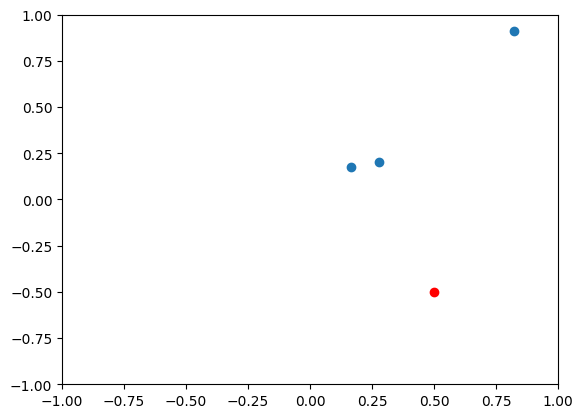

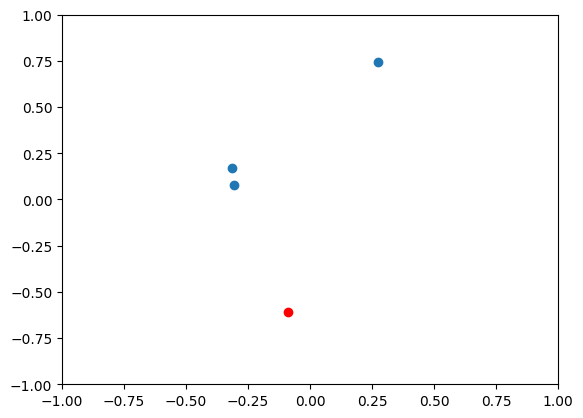

In [5]:
# visualize top-down
poses = Gen.get_retval(trace)
plot_topdown_view(gt_poses)
plot_topdown_view(poses);